<a href="https://colab.research.google.com/github/KyleShafer/MIS515/blob/main/MIS_515_Linear_Regression_Model_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Crab Regression- Data Defenders**

In [ ]:
#Jhodail Santos
#Kyle Shafer

**Autosaving Command**

In [ ]:
%autosave 60

Autosaving every 60 seconds


**Downloading the Dataset**

In [ ]:
#Crab Regression Data From Kaggle
#https://www.kaggle.com/competitions/playground-series-s3e16/discussion/416903

**Data Cleaning Techniques**

In [ ]:
#Excel
#Data cleaning steps
#Finding blank data cells in excel
#-select columns
#-click find & select

#Python
#Importing Libraries #Pandas, Numpy,Seaborn,Matplotlib
#Check the shape,empty rows,using isna(),shape
#check the outliers using IQR
#Data Visuaization using seaborn
#use functions like .isnull(),notnull() in pandas
#describe

**Importing Libraries**

In [ ]:
#Import Libraries to Use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Creating the Dataframes**

In [ ]:
#Defining our Datasets with Pandas
#Creating Variables to read the CSV Files
test_df=pd.read_csv("test.csv")
df=pd.read_csv('train.csv')
test_df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
...,...,...,...,...,...,...,...,...,...
49363,123414,F,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309
49364,123415,I,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687
49365,123416,F,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345
49366,123417,F,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163


In [ ]:
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0
...,...,...,...,...,...,...,...,...,...,...
59666,59666,F,1.6250,1.2750,0.4375,39.760174,19.646203,8.575724,11.765042,9.0
59667,59667,I,1.1250,0.8875,0.3000,12.785625,5.443104,2.749901,3.685435,8.0
59668,59668,M,1.4375,1.1250,0.3750,23.884454,10.857859,5.556502,6.236890,8.0
59669,59669,F,1.3250,1.0625,0.3250,22.140960,11.070480,5.684075,6.095142,8.0


In [ ]:
df.dropna()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0
...,...,...,...,...,...,...,...,...,...,...
59665,59665,M,1.5875,1.2625,0.4250,44.551239,18.625622,8.561549,10.489315,14.0
59666,59666,F,1.6250,1.2750,0.4375,39.760174,19.646203,8.575724,11.765042,9.0
59667,59667,I,1.1250,0.8875,0.3000,12.785625,5.443104,2.749901,3.685435,8.0
59668,59668,M,1.4375,1.1250,0.3750,23.884454,10.857859,5.556502,6.236890,8.0


# **Exploratory Data Analysis (EDA)**

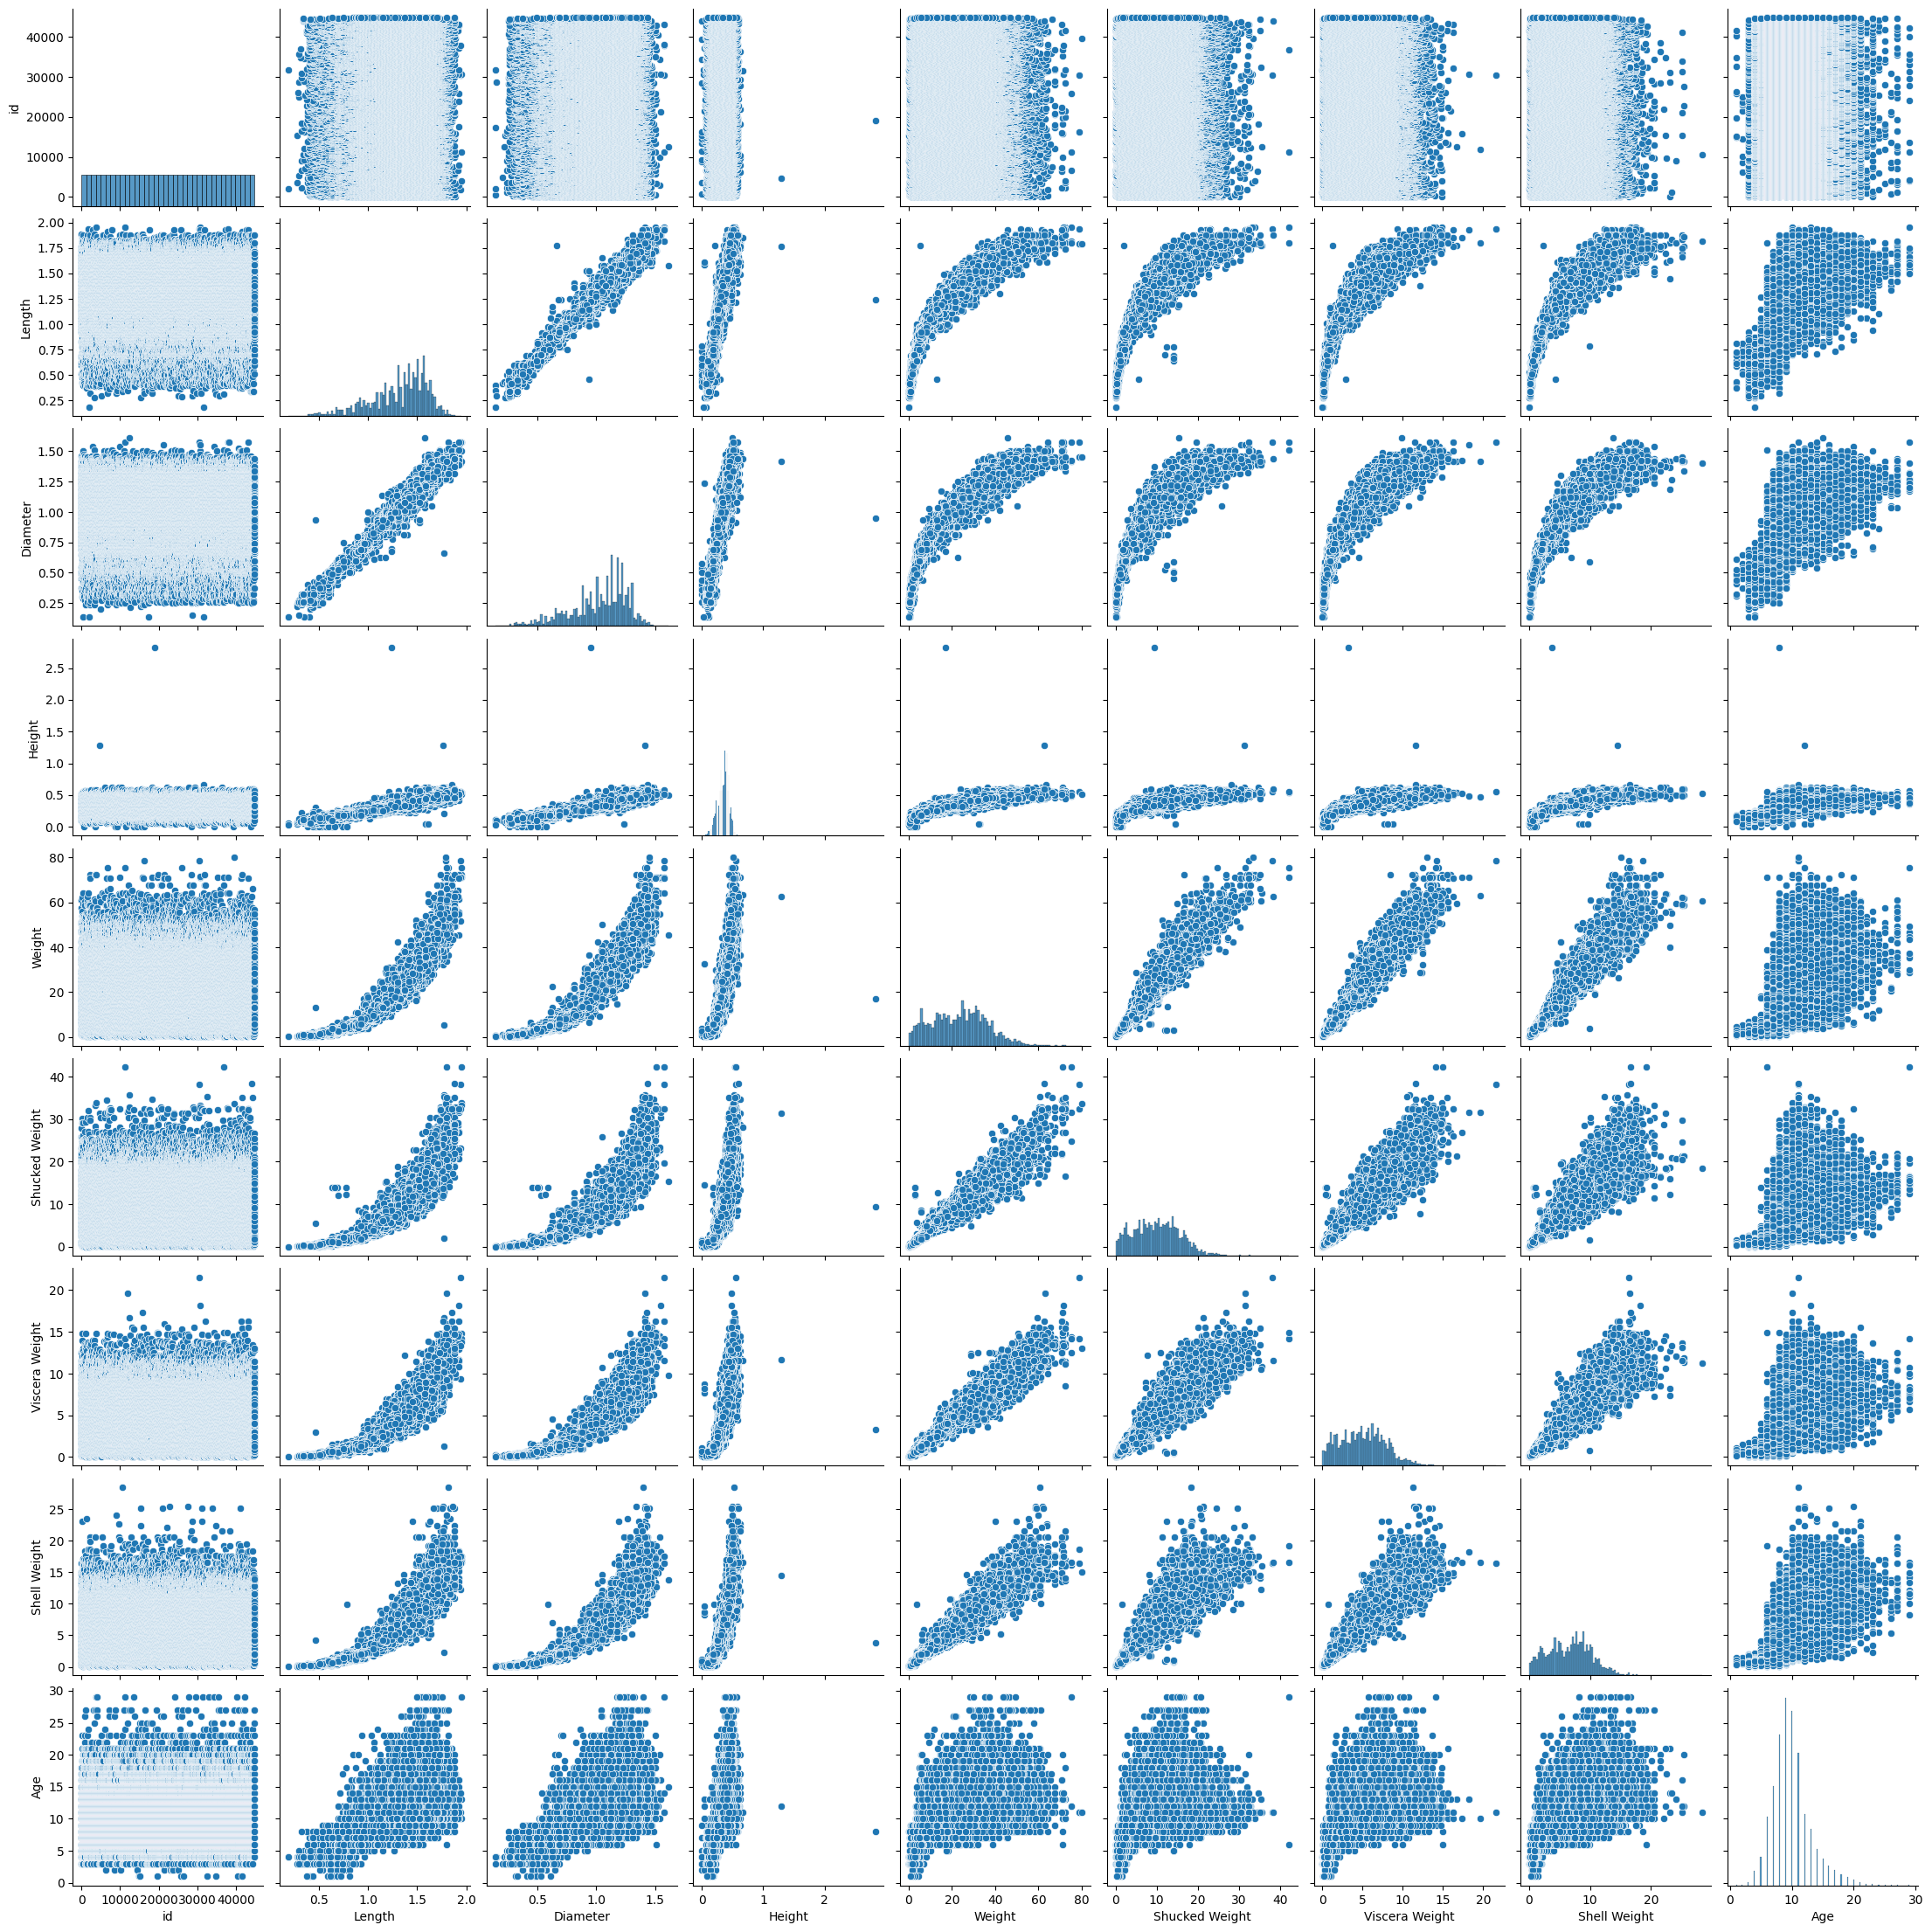

In [ ]:
#Create Visulation
#Pairplot to View relationships within our dataset
#Summarize the Data to help View Outliers
sns.pairplot(df)

<ipython-input-15-e57fc96a0778>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

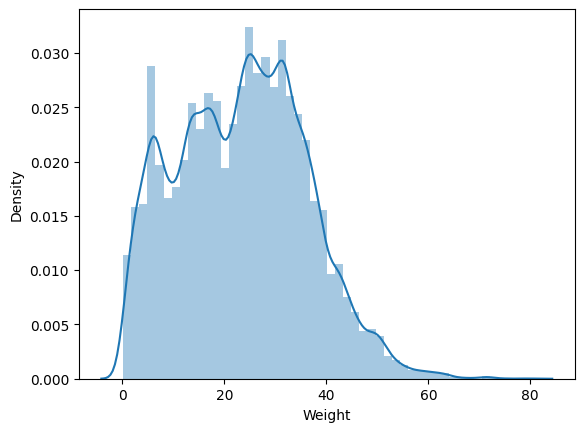

In [ ]:
#Displot to depict the variation in the Data Distribution
sns.distplot(df['Weight'])

<ipython-input-16-d03b19ba92b8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="crest")


<Axes: >

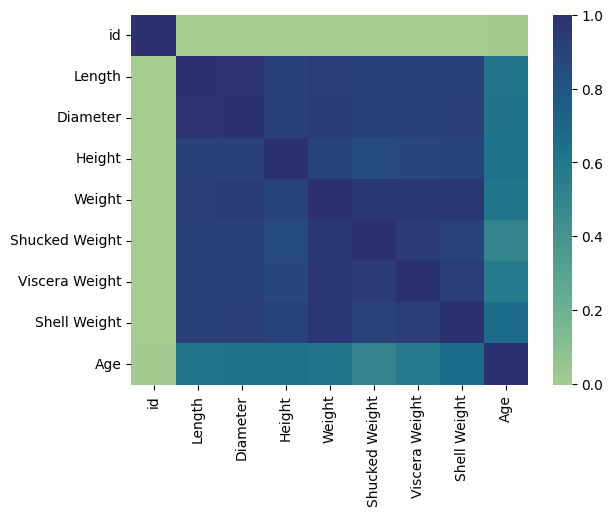

In [ ]:
#Heatmap to Visualize the Data in Color to Show the Relation Between Data
#Created 7 Heatmaps to help Interpret Data in Diffrent Ways
#Heatmap1

sns.heatmap(df.corr(), cmap="crest")

<ipython-input-17-2da7e579d915>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm")


<Axes: >

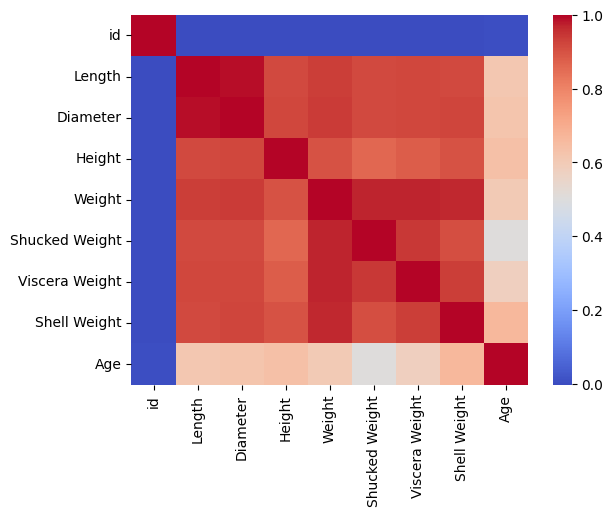

In [ ]:
#Heatmap2
sns.heatmap(df.corr(), cmap="coolwarm")

<ipython-input-18-3474f450c316>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="flare")


<Axes: >

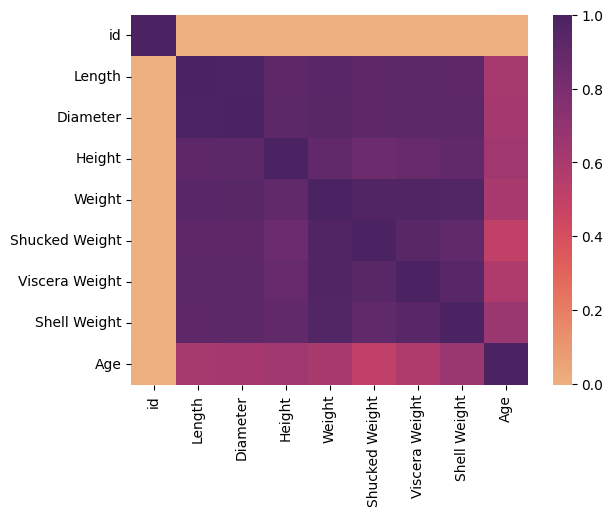

In [ ]:
#Heatmap3
sns.heatmap(df.corr(), cmap="flare")


<ipython-input-19-c4287cb9c45c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="cubehelix")


<Axes: >

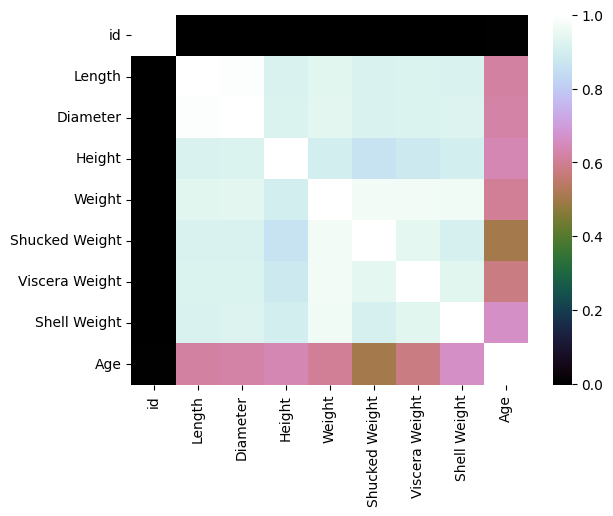

In [ ]:
#Heatmap4
sns.heatmap(df.corr(), cmap="cubehelix")

<ipython-input-20-71f84da341fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="mako",annot=True,annot_kws={'fontweight':"bold"})


<Axes: >

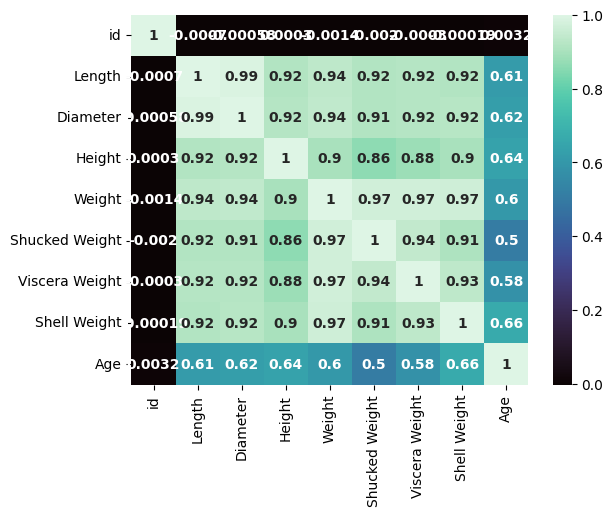

In [ ]:
#Heatmap5
sns.heatmap(df.corr(), cmap="mako",annot=True,annot_kws={'fontweight':"bold"})

<ipython-input-21-931807a0ba33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="viridis")


<Axes: >

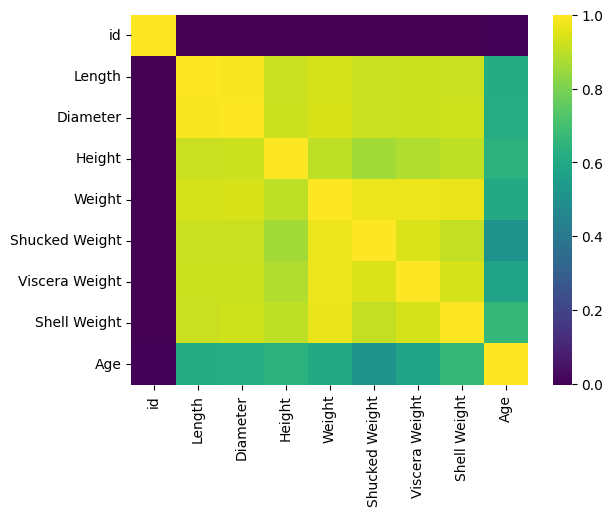

In [ ]:
#Heatmap6
sns.heatmap(df.corr(), cmap="viridis")

<ipython-input-22-35451c3d4dc1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="magma")


<Axes: >

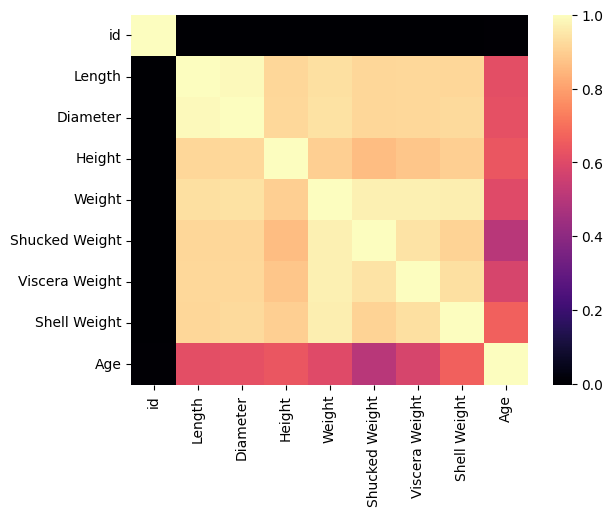

In [ ]:
#Heatmap7
sns.heatmap(df.corr(), cmap="magma")

**Creating the Linear Regression Models**

In [ ]:
# x-values of 'Length', 'Diameter', 'Shucked Weight', 'Viscera Weight', and 'Shell Weight'
# y-values of 'Length', 'Diameter', 'Shucked Weight', 'Viscera Weight', and 'Shell Weight'
# Cleaned our Data by Removing ID,Height, Age Data Points from Regression Model
x=df[['Length','Diameter','Shucked Weight','Viscera Weight','Shell Weight']]
y=df['Weight']

# **Linear Regression Model (random_state 76)**

In [ ]:
# imports 'sklearn.model_selection' and 'train_test_split'
# creates a test size of '0.2' with a randomness of '76' and assigns it to 'x_train', 'x_test', 'y_train', and 'y_test'

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2,random_state=76)

In [ ]:
# create and training the linear model program

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x1_train,y1_train)

ValueError: ignored

**Model Evaluation**

In [ ]:
# print the intercept of model 1

print(model1.intercept_)

In [ ]:
coeff_df = pd.DataFrame(model1.coef_,x.columns,columns=['Coefficient'])
coeff_df

**Predicting the Model**

In [ ]:
predictions1 = model1.predict(x1_test)

In [ ]:
# Outputs scatterplot with randomness of '76'

plt.scatter(y1_test,predictions1)
plt.title("""Crab Weight Scatterplot
(random_state=76)""")

**Regression Evaluation Metrics**

In [ ]:
# imports metrics from sklearn libraries

from sklearn import metrics

In [ ]:
# prints out Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)

print('MAE:', metrics.mean_absolute_error(y1_test, predictions1))
print('MSE:', metrics.mean_squared_error(y1_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions1)))

# **Linear Regression Model (random_state 101)**

In [ ]:
# creates a test size of '0.2' with a randomness of '101' and assigns it to 'x_train', 'x_test', 'y_train', and 'y_test'

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.2,random_state=101)

In [ ]:
# creating and training the second model
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x2_train,y2_train)

**Model Evaluation**

In [ ]:
# print the intercept of model 2

print(model2.intercept_)

In [ ]:
coeff_df = pd.DataFrame(model2.coef_,x.columns,columns=['Weight'])
coeff_df

**Predicting the Model**

In [ ]:
predictions2 = model2.predict(x2_test)

In [ ]:
# Outputs scatterplot with randomness of '101'

plt.scatter(y2_test,predictions2)
plt.title("""Crab Weight Scatterplot
(random_state=101)""")

**Regression Evaluation Metrics**

In [ ]:
# imports metrics from sklearn libraries

from sklearn import metrics

In [ ]:
# prints out Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)

print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))